In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.special import comb 
from itertools import combinations, permutations
import sys
from collections import defaultdict
import random
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules


In [23]:
df=pd.read_excel('ItemList.xlsx', usecols = "A:J",header=None)

In [24]:
headers=["Item_1", "Item_2","Item_3","Item_4","Item_5","Item_6","Item_7","Item_8","Item_9", "Item_10"]
df.columns=headers
df.head()

,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9,Item_10
0,sausage,whole milk,semi-finished bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN
1,whole milk,pastry,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,canned beer,misc. beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sausage,hygiene articles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,soda,pickled vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
Row_list =[]

for index, rows in df.iterrows():
    
    my_list =[rows.Item_1, rows.Item_2,rows.Item_3,rows.Item_4,rows.Item_5,rows.Item_6,rows.Item_7,rows.Item_8, rows.Item_9,rows.Item_10]
      
    Row_list.append(my_list)
  
for i in range(len(Row_list)):
    Row_list[i] = list(filter(lambda x: str(x) != 'nan', Row_list[i]))
Row_list

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk'

In [26]:
# biến đổi dữ liệu
t_encode = TransactionEncoder()
# t_array = t_encode.fit(dataset).transform(dataset)
t_array = t_encode.fit_transform(Row_list)
df_encoded = pd.DataFrame(t_array, columns=t_encode.columns_)

In [27]:
# sử dụng apriori với giá trị ngưỡng dựa trên số transaction
frequent_itemset = apriori(df_encoded, min_support=0.0003, use_colnames=True)
print(frequent_itemset)

In [ ]:
rules = association_rules(frequent_itemset, metric='lift', min_threshold=1.4)
rules
    

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(root vegetables),(Instant food products),0.069572,0.004010,0.000401,0.005764,1.437368,0.000122,1.001764
1,(Instant food products),(root vegetables),0.004010,0.069572,0.000401,0.100000,1.437368,0.000122,1.033809
2,(butter milk),(UHT-milk),0.017577,0.021386,0.000601,0.034221,1.600131,0.000226,1.013289
3,(UHT-milk),(butter milk),0.021386,0.017577,0.000601,0.028125,1.600131,0.000226,1.010854
4,(cream cheese),(UHT-milk),0.023658,0.021386,0.000869,0.036723,1.717152,0.000363,1.015922
...,...,...,...,...,...,...,...,...,...
1181,"(rolls/buns, sausage)","(whole milk, yogurt)",0.005347,0.011161,0.000334,0.062500,5.599925,0.000274,1.054762
1182,(whole milk),"(yogurt, rolls/buns, sausage)",0.157923,0.000601,0.000334,0.002116,3.517892,0.000239,1.001518
1183,(yogurt),"(whole milk, rolls/buns, sausage)",0.085879,0.001136,0.000334,0.003891,3.424811,0.000237,1.002766
1184,(rolls/buns),"(whole milk, yogurt, sausage)",0.110005,0.001470,0.000334,0.003038,2.066028,0.000172,1.001572


In [ ]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         1186 non-null   object 
 1   consequents         1186 non-null   object 
 2   antecedent support  1186 non-null   float64
 3   consequent support  1186 non-null   float64
 4   support             1186 non-null   float64
 5   confidence          1186 non-null   float64
 6   lift                1186 non-null   float64
 7   leverage            1186 non-null   float64
 8   conviction          1186 non-null   float64
dtypes: float64(7), object(2)
memory usage: 83.5+ KB


In [ ]:
support=rules['support'].values
confidence=rules['confidence'].values
lift = rules['lift'].values


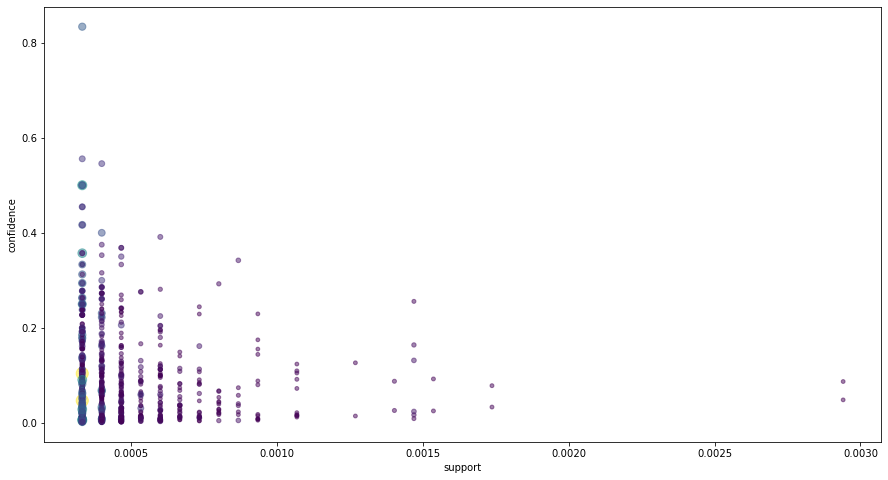

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(support, confidence, s= lift*10 ,alpha=0.5, c = lift)
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()


*Trong thông tin kết quả có 'sausage'. 'sausage' kết hợp với item sau đây*

In [ ]:
for row in rules.iterrows():
    if 'sausage' in row[1][0]:
        print(row)

(37, antecedents             (sausage)
consequents           (beverages)
antecedent support       0.060349
consequent support       0.016574
support                  0.001537
confidence               0.025471
lift                     1.536764
leverage                 0.000537
conviction               1.009129
Name: 37, dtype: object)
(73, antecedents            (sausage)
consequents           (cake bar)
antecedent support      0.060349
consequent support      0.006148
support                 0.000668
confidence              0.011074
lift                    1.801122
leverage                0.000297
conviction              1.004981
Name: 73, dtype: object)
(79, antecedents           (sausage)
consequents           (candles)
antecedent support     0.060349
consequent support     0.004411
support                0.000401
confidence             0.006645
lift                   1.506393
leverage               0.000135
conviction             1.002249
Name: 79, dtype: object)
(174, antecedents  

In [ ]:
result = df_encoded.apply(pd.value_counts).fillna(0)
result

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
False,14903,14643,14941,14934,14960,14959,14842,14946,14455,14637,...,14883,14912,14686,14309,14955,14604,14788,12600,13678,14903
True,60,320,22,29,3,4,121,17,508,326,...,80,51,277,654,8,359,175,2363,1285,60


In [ ]:
df_true = result.iloc[1,:]
df_true[:10]

Instant food products     60
UHT-milk                 320
abrasive cleaner          22
artif. sweetener          29
baby cosmetics             3
bags                       4
baking powder            121
bathroom cleaner          17
beef                     508
berries                  326
Name: True, dtype: int64

In [ ]:
 items = df_true.sort_values(ascending=False)
 items

whole milk               2363
other vegetables         1827
rolls/buns               1646
soda                     1453
yogurt                   1285
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: True, Length: 167, dtype: int64

*15 sản phẩm được mua nhiều nhất. Vẽ biểu đồ*

In [ ]:
max_ = items[:15]
max_

whole milk          2363
other vegetables    1827
rolls/buns          1646
soda                1453
yogurt              1285
root vegetables     1041
tropical fruit      1014
bottled water        908
sausage              903
citrus fruit         795
pastry               774
pip fruit            734
shopping bags        712
canned beer          702
bottled beer         678
Name: True, dtype: int64

In [ ]:
pos_max = np.arange(len(max_.values))

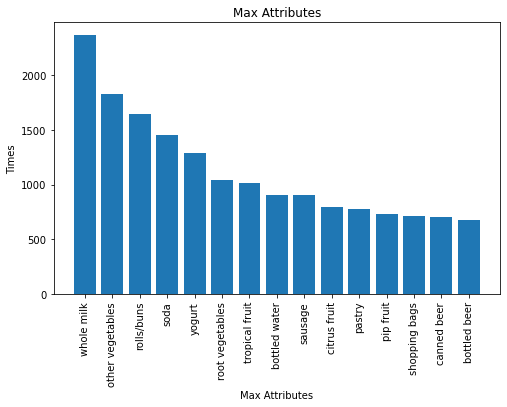

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(pos_max, max_.values, align='center')
plt.xticks(pos_max, max_.keys(), rotation='vertical')
plt.ylabel('Times')
plt.xlabel('Max Attributes')
plt.title('Max Attributes')
plt.show()

*15 sản phẩm được mua ít nhất. Vẽ biểu đồ*

In [ ]:
min_ = items[-15:]
min_

specialty vegetables     11
organic products         10
decalcifier               9
hair spray                9
liqueur                   9
whisky                    8
salad dressing            6
make up remover           5
toilet cleaner            5
frozen chicken            5
rubbing alcohol           5
bags                      4
baby cosmetics            3
kitchen utensil           1
preservation products     1
Name: True, dtype: int64

In [ ]:
pos_min = np.arange(len(min_.values))

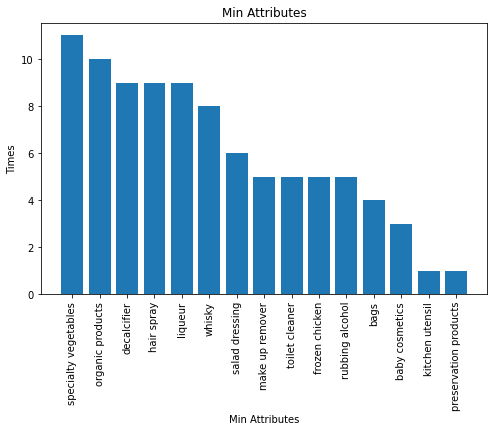

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(pos_min, min_.values, align='center')
plt.xticks(pos_min, min_.keys(), rotation='vertical')
plt.ylabel('Times')
plt.xlabel('Min Attributes')
plt.title('Min Attributes')
plt.show()